In [1]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes = True)

In [3]:
data = pd.read_csv("banking.csv")

In [4]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


Exploratory Data Analysis

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [6]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [10]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [12]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [17]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [20]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [16]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [25]:

data['education'] = np.where(data['education'] == 'basic.4y','basic',data['education'])
data['education'] = np.where(data['education'] == 'basic.9y', 'basic',data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'basic',data['education'])

In [26]:
data['education'].value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [27]:
data['y'].value_counts()


0    36548
1     4640
Name: y, dtype: int64

#this is the imbalance class problem which will be handling during preproscessing steps

visualization

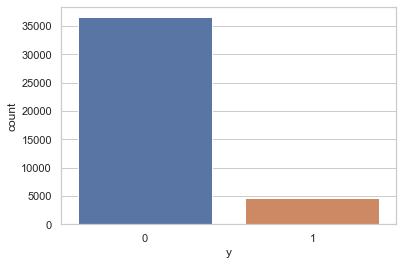

In [28]:
sns.countplot(x='y', data = data)
plt.show()

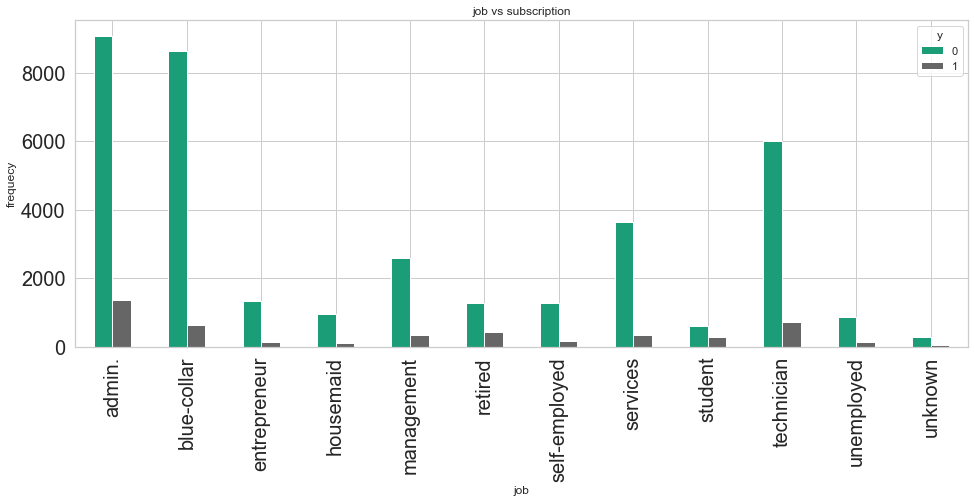

In [32]:
%matplotlib inline 
pd.crosstab(data.job,data.y).plot(kind ='bar', figsize = (16,6), colormap ='Dark2',fontsize= 20)
plt.title('job vs subscription')
plt.xlabel('job')
plt.ylabel('frequecy')
plt.show()

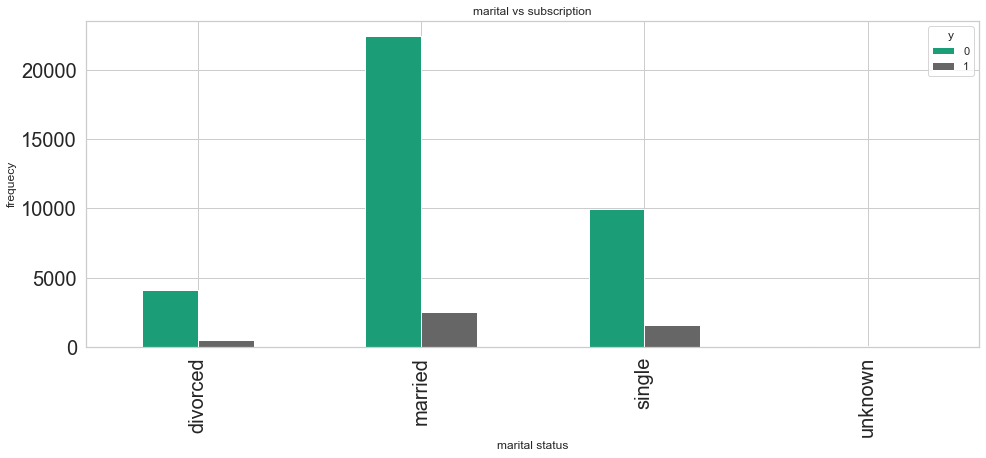

In [33]:
pd.crosstab(data.marital,data.y).plot(kind ='bar', figsize = (16,6), colormap ='Dark2',fontsize= 20)
plt.title('marital vs subscription')
plt.xlabel('marital status')
plt.ylabel('frequecy')
plt.show()

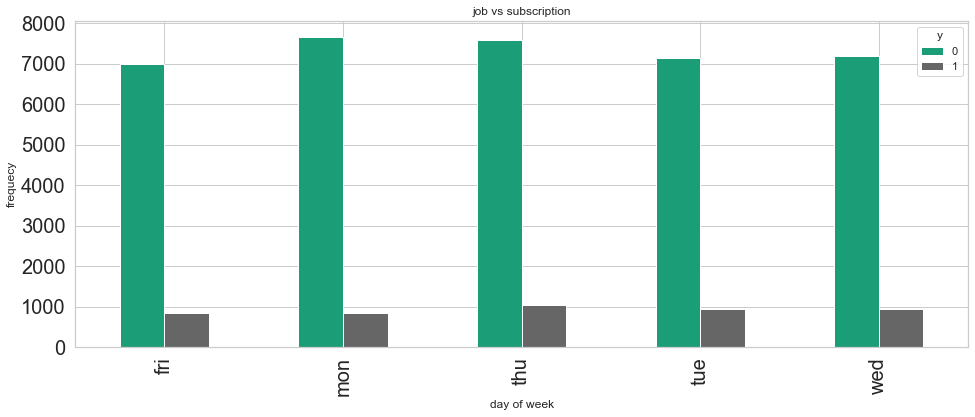

In [34]:
pd.crosstab(data.day_of_week,data.y).plot(kind ='bar', figsize = (16,6), colormap ='Dark2',fontsize= 20)
plt.title('job vs subscription')
plt.xlabel('day of week')
plt.ylabel('frequecy')
plt.show()

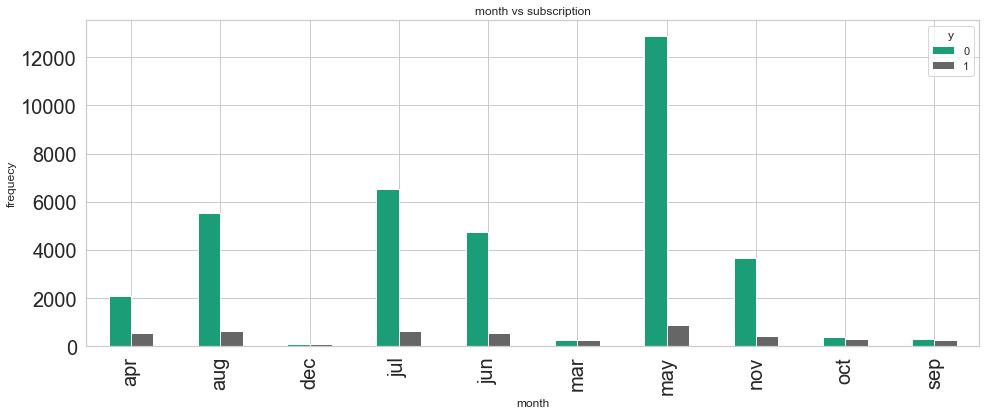

In [35]:
pd.crosstab(data.month,data.y).plot(kind ='bar', figsize = (16,6), colormap ='Dark2',fontsize= 20)
plt.title('month vs subscription')
plt.xlabel('month')
plt.ylabel('frequecy')
plt.show()

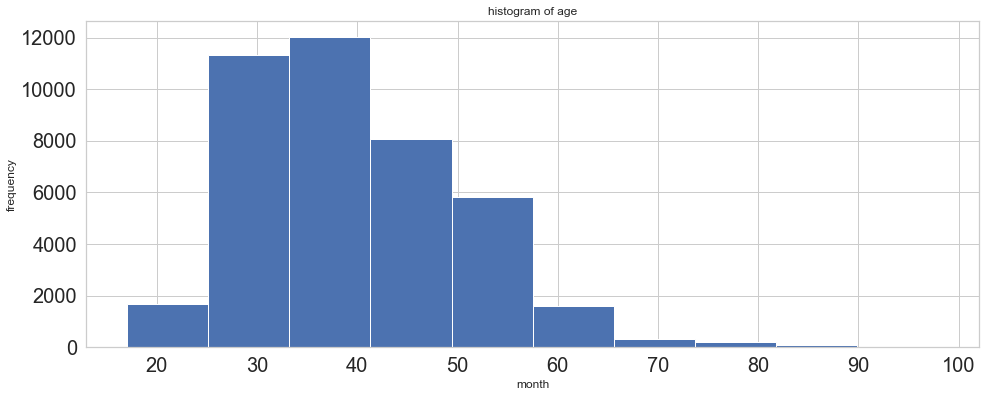

In [36]:
data.age.hist(figsize=(16,6), xlabelsize= 20, ylabelsize=20)
plt.title('histogram of age')
plt.xlabel('month')
plt.ylabel('frequency')
plt.show()

preprocessing

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

chartable variable dont work in ml so we convert char variable into dummy variable 

In [38]:
cat_vars = ['job','marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for var in cat_vars:
    cat_list = pd.get_dummies(data[var],prefix=var)
    data1 =data.join(cat_list)
    data =data1
    data_vars = data1.columns.values.tolist()

In [39]:
print(data_vars)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_

In [41]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,...,0,0,0,0,1,0,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0,0,0,0,1,0,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0,0,1,0,0,0,0,0,1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,...,0,0,1,0,0,0,0,0,0,1


In [42]:
data.loc[:,'job':'job_unknown'].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,210,...,0,0,0,0,0,0,0,0,0,0
1,technician,married,unknown,no,no,no,cellular,nov,fri,138,...,0,0,0,0,0,0,0,1,0,0
2,management,single,university.degree,no,yes,no,cellular,jun,thu,339,...,0,0,1,0,0,0,0,0,0,0
3,services,married,high.school,no,no,no,cellular,apr,fri,185,...,0,0,0,0,0,1,0,0,0,0
4,retired,married,basic,no,yes,no,cellular,aug,fri,137,...,0,0,0,1,0,0,0,0,0,0


In [43]:
columns_to_keep = [i for i in data_vars if i not in cat_vars]

In [44]:
print(columns_to_keep)

['age', 'default', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


In [45]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [48]:
data = data[columns_to_keep]

In [49]:
data.columns

Index(['age', 'default', 'duration', 'campaign', 'pdays', 'previous',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_

oversampling using SMOTE

In [67]:
from imblearn.over_sampling import SMOTE

In [62]:
X =data.loc[:,data.columns != 'y']
# all independent variables with all rows
Y = data.loc[:,data.columns == 'y']
#target variables with all rows

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 3, random_state =0)

In [64]:
over_sampling = SMOTE(random_state=0)

In [65]:
columns = X_train.columns

In [ ]:
over_sample_X, over_sample_Y = over_sampling.fit_sample(X_train,Y_train)

In [ ]:
over_sample_X = pd.DataFrame(data = over_sample_X,columns=columns)
over_sample_Y = pd.DataFrame(data = over_sample_Y,columns=['Y'])

In [ ]:
len(over_sample_X)

In [ ]:
len(over_sample_Y)

In [ ]:
len(over_sample_Y[over_sample_Y['Y'] == 0]) # not subscribed class

In [ ]:
len(over_sample_Y[over_sample_Y['Y'] == 1]) #  subscribed class

RFE - REcursive Feature Elimination Technique

In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['Y']
x=[i for i data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logerg = LogisticRegression()
rfe =RFE(logreg,20)
rfe = rfe.fit(os_data_x,os_data_y.values.revel())
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
print(data_final_vars)